<a href="https://colab.research.google.com/github/JahnaviJain/ML-Approach/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

In [4]:
df=pd.read_csv('/content/ml1.csv')

In [5]:
df.shape

(89, 8)

In [6]:
df.head()

,Δc_TD (°),ΔE_TD (GPa),SF1,SF2,Δ SF,c-mis (°),m’,outcome
0,6.56,2.44,0.36,0.42,0.06,15.2,0.99,0
1,4.00,2.49,0.31,0.28,0.03,9.0,0.99,0
2,2.18,0.20,0.44,0.46,0.02,4.9,0.99,0
3,7.39,1.89,0.40,0.47,0.07,10.6,0.77,0
4,17.31,2.74,0.40,0.47,0.07,19.8,0.87,0


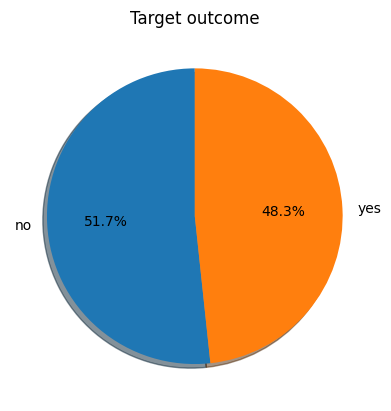

In [7]:
# prompt: pie chart for the target outcome

import matplotlib.pyplot as plt
sizes=df['outcome'].value_counts()
labels=['no','yes']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Target outcome')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

X = df[['Δc_TD (°)','ΔE_TD (GPa)','SF1','SF2','Δ SF','c-mis (°)','m’']]
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100,random_state=100)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=100)

In [10]:
X_train

,Δc_TD (°),ΔE_TD (GPa),SF1,SF2,Δ SF,c-mis (°),m’
9,8.39,2.79,0.45,0.39,0.06,13.6,0.87
67,26.00,8.00,0.50,0.20,0.30,74.0,0.30
5,8.64,4.31,0.38,0.31,0.07,9.5,0.72
75,5.00,1.00,0.40,0.40,0.00,50.0,0.70
40,5.90,0.00,0.49,0.48,0.01,27.9,0.70
...,...,...,...,...,...,...,...
20,24.10,6.03,0.39,0.50,0.11,58.7,0.54
60,13.00,1.00,0.39,0.46,0.07,50.8,0.57
71,27.00,9.00,0.20,0.40,0.20,72.0,0.40
14,1.25,0.19,0.45,0.42,0.03,11.1,0.97


In [11]:
X_test

,Δc_TD (°),ΔE_TD (GPa),SF1,SF2,Δ SF,c-mis (°),m’
44,11.00,0.00,0.45,0.49,0.04,35.6,0.78
53,14.00,0.00,0.49,0.40,0.09,64.1,0.42
30,29.54,16.05,0.44,0.21,0.23,86.0,0.27
12,0.88,0.07,0.48,0.46,0.02,6.6,0.78
49,20.40,0.00,0.37,0.49,0.12,68.4,0.47
0,6.56,2.44,0.36,0.42,0.06,15.2,0.99
64,14.00,1.00,0.50,0.40,0.10,69.0,0.30
18,25.03,6.84,0.48,0.27,0.21,73.0,0.38
10,12.41,1.73,0.25,0.49,0.24,45.2,0.72
22,26.08,9.47,0.48,0.30,0.18,31.5,0.84


In [12]:
y_pred = model.predict(X_test)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.75      0.92      0.83        13

    accuracy                           0.81        27
   macro avg       0.83      0.82      0.81        27
weighted avg       0.83      0.81      0.81        27

[[10  4]
 [ 1 12]]


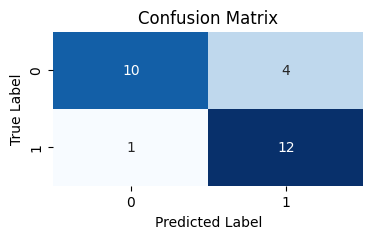

In [14]:
# prompt: plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a subplot for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.75      0.92      0.83        13

    accuracy                           0.81        27
   macro avg       0.83      0.82      0.81        27
weighted avg       0.83      0.81      0.81        27



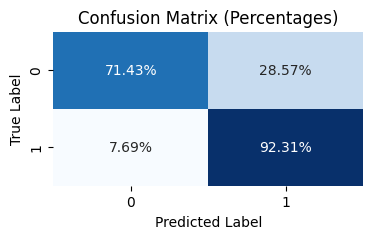

In [15]:
# Classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a subplot for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentages)")

# Show the plot
plt.show()


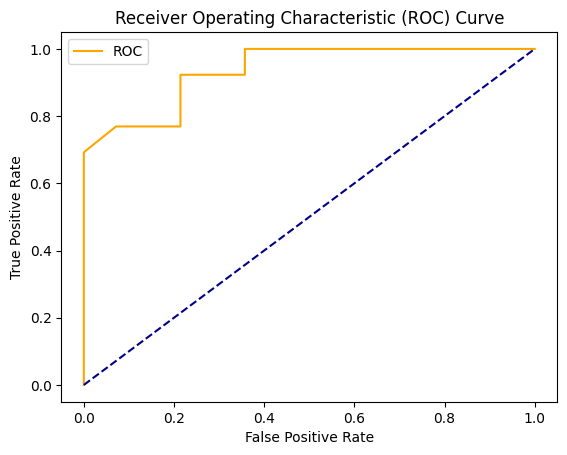

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [17]:
# prompt: the data for thr roc curve

# Assuming 'model' is your trained classifier and 'X_test', 'y_test' are your test data
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Print the data
print("False Positive Rates:", fpr)
print("True Positive Rates:", tpr)
print("Thresholds:", thresholds)


False Positive Rates: [0.         0.         0.         0.         0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.64285714 0.92857143 1.        ]
True Positive Rates: [0.         0.15384615 0.38461538 0.69230769 0.76923077 0.76923077
 0.92307692 0.92307692 1.         1.         1.         1.        ]
Thresholds: [ inf 1.   0.99 0.77 0.69 0.64 0.56 0.48 0.47 0.11 0.04 0.  ]


In [18]:
# prompt: find the area under the roc curve

from sklearn.metrics import roc_auc_score

# Calculate the AUC score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Print the AUC score
print(f"AUC Score: {auc_score}")


AUC Score: 0.9368131868131868


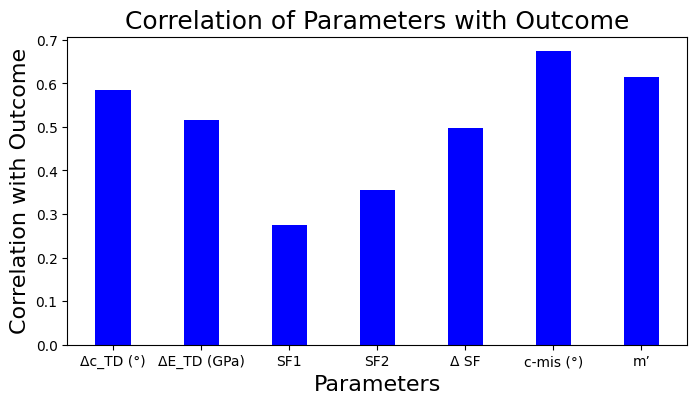

In [19]:
# prompt: bar plot of all parameter with outcome

import matplotlib.pyplot as plt
import numpy as np

# Prepare data
parameters = ['Δc_TD (°)','ΔE_TD (GPa)','SF1','SF2','Δ SF','c-mis (°)','m’']
correlations = [df['outcome'].corr(df[parameter]) for parameter in parameters]
correlations1=np.abs(correlations)

# Create bar plot
plt.figure(figsize=(8, 4))
plt.bar(parameters, correlations1, color='blue', width=0.4)

# Add labels and title
plt.xlabel('Parameters', fontsize=16)
plt.ylabel('Correlation with Outcome', fontsize=16)
plt.title('Correlation of Parameters with Outcome', fontsize=18)

# Show plot
plt.show()


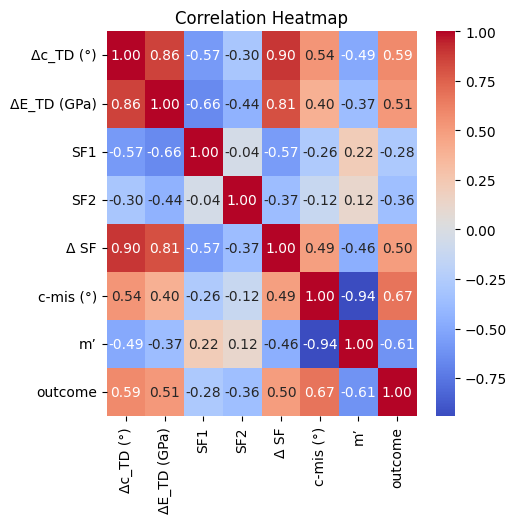

In [20]:
# prompt: generate a heat map
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# prompt: values for the heatmap component

# Assuming 'corr_matrix' is your correlation matrix
values = corr_matrix.values

# Print the values
print(values)


[[ 1.          0.85995243 -0.57424939 -0.30392351  0.89744742  0.53667633
  -0.49202027  0.58501451]
 [ 0.85995243  1.         -0.65749233 -0.43800357  0.81233029  0.3972524
  -0.36935394  0.51495513]
 [-0.57424939 -0.65749233  1.         -0.04167443 -0.56731702 -0.26148302
   0.21646677 -0.27576301]
 [-0.30392351 -0.43800357 -0.04167443  1.         -0.37384482 -0.11864183
   0.11864539 -0.3555383 ]
 [ 0.89744742  0.81233029 -0.56731702 -0.37384482  1.          0.48528924
  -0.4589022   0.49752276]
 [ 0.53667633  0.3972524  -0.26148302 -0.11864183  0.48528924  1.
  -0.94352113  0.67371234]
 [-0.49202027 -0.36935394  0.21646677  0.11864539 -0.4589022  -0.94352113
   1.         -0.61428816]
 [ 0.58501451  0.51495513 -0.27576301 -0.3555383   0.49752276  0.67371234
  -0.61428816  1.        ]]


In [22]:
# prompt: Give all the correlation percentages of the parameters

import numpy as np
# Prepare data
parameters = ['Δc_TD (°)','ΔE_TD (GPa)','SF1','SF2','Δ SF','c-mis (°)','m’']
correlations = [df['outcome'].corr(df[parameter]) for parameter in parameters]
correlations1=np.abs(correlations)

# Print correlation percentages
for parameter, correlation in zip(parameters, correlations1):
    print(f"Correlation between outcome and {parameter}: {correlation * 100:.2f}%")


Correlation between outcome and Δc_TD (°): 58.50%
Correlation between outcome and ΔE_TD (GPa): 51.50%
Correlation between outcome and SF1: 27.58%
Correlation between outcome and SF2: 35.55%
Correlation between outcome and Δ SF: 49.75%
Correlation between outcome and c-mis (°): 67.37%
Correlation between outcome and m’: 61.43%


In [23]:
import numpy as np
def predict_outcome(values): # Changed 'value' to 'values'

  # Convert the values to a NumPy array with the correct shape
  values = np.array([values]) # Changed to create a 2D array

  # Predict the outcome using the model
  prediction = model.predict(values)[0]

  # Return the predicted outcome
  return prediction

# Example usage, assuming your model expects 6 features
print(predict_outcome([6,3,0.2,0.3,0.1,8.7,0.9]))
print(predict_outcome([32,9,0.4,0.2,0.2,62,0.4]))

0
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
